In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.stats import norm
import torch
import torch.nn.functional as F
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

In [4]:
!pip3 install torch torchvision torchaudio

In [5]:
print(torch.__version__)

2.6.0.dev20250102+cpu


In [6]:
print(torchvision.__version__)

0.22.0.dev20250102+cpu


In [7]:
x = torch.tensor(5.0)
print(x)

y = 3 * x**2
print(y)

tensor(5.)
tensor(75.)


In [8]:
x = torch.tensor(5.0, requires_grad=True)
y = 3 * x**2

y.backward()
print(x.grad)

tensor(30.)


In [9]:
def rosenbrock(x0, x1):
    y = 100 * (x1 - x0 ** 2) ** 2 + (x0 - 1) ** 2
    return y

x0 = torch.tensor(0.0, requires_grad=True)
x1 = torch.tensor(2.0, requires_grad=True)

y = rosenbrock(x0, x1)
y.backward()
print(x0.grad, x1.grad)

tensor(-2.) tensor(400.)


In [10]:
x0 = torch.tensor(0.0, requires_grad=True)
x1 = torch.tensor(2.0, requires_grad=True)

iters = 10000
lr = 0.001

for i in range(iters):
    y = rosenbrock(x0, x1)

    if i % 1000 == 0:
        print(x0.item(), x1.item(), y.item())

    y.backward()

    x0.data -= lr * x0.grad.data
    x1.data -= lr * x1.grad.data

    x0.grad.zero_()
    x1.grad.zero_()

print(x0.item(), x1.item(), y.item())

0.0 2.0 401.0
0.6837119460105896 0.4659528136253357 0.10026590526103973
0.8263181447982788 0.6820318102836609 0.03022465482354164
0.8947840929031372 0.8001903295516968 0.011090477928519249
0.9334872364997864 0.8711214661598206 0.004431619308888912
0.9569892883300781 0.9156519174575806 0.0018530404195189476
0.9718162417411804 0.9443121552467346 0.0007956393528729677
0.9813804626464844 0.9630323052406311 0.00034725386649370193
0.98763507604599 0.9753732085227966 0.00015313964104279876
0.9917610883712769 0.983556866645813 6.798988761147484e-05
0.9944981336593628 0.9890044331550598 3.034370456589386e-05


41.89796447753906
0.22483211755752563
0.0925208106637001
0.0888015553355217
0.08627457916736603
0.08435674756765366
0.0829005315899849
0.0817948430776596
0.08095530420541763
0.08031783998012543
0.07987643033266068 , W =  2.2863590717315674 , b =  5.3144850730896


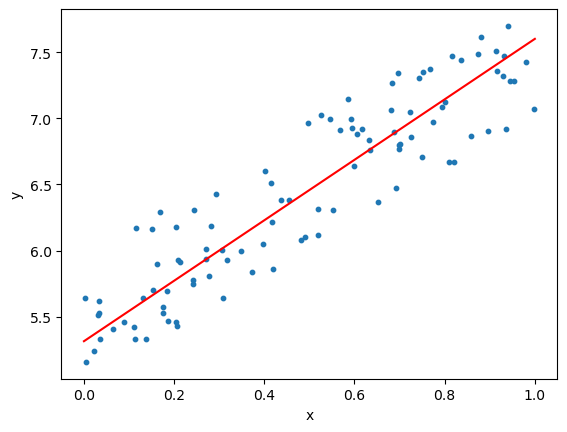

In [11]:
torch.manual_seed(0)
x = torch.rand(100, 1)
y = 2 * x + 5 + torch.rand(100, 1)

W = torch.zeros((1, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

def predict(x):
    y = x @ W + b
    return y

def mean_squared_error(x0, x1):
    diff = x0 - x1
    N = len(diff)
    return torch.sum(diff ** 2) / N


lr = 0.1
iters = 100

for i in range(iters):
    y_hat = predict(x)
    loss = mean_squared_error(y, y_hat)

    loss.backward()

    W.data -= lr * W.grad.data
    b.data -= lr * b.grad.data

    W.grad.zero_()
    b.grad.zero_()

    if i % 10 == 0:
        print(loss.item())

print(loss.item(), ', W = ', W.item(), ', b = ', b.item())

plt.scatter(x.detach().numpy(), y.detach().numpy(), s=10)
x = torch.tensor([[0.0], [1.0]])
y = W.data.numpy() * x.data.numpy() + b.data.numpy()
plt.plot(x, y, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

41.89796447753906
0.22483211755752563
0.0925208106637001
0.0888015553355217
0.08627457916736603
0.08435674756765366
0.0829005315899849
0.0817948430776596
0.08095530420541763
0.08031783998012543
0.07987643033266068 , W =  2.2863590717315674 , b =  5.3144850730896


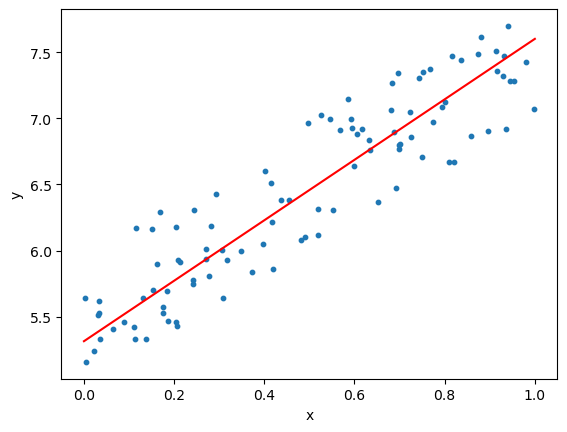

In [12]:
torch.manual_seed(0)
x = torch.rand(100, 1)
y = 2 * x + 5 + torch.rand(100, 1)

W = torch.zeros((1, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)


lr = 0.1
iters = 100

for i in range(iters):
    y_hat = predict(x)
    # loss = mean_squared_error(y, y_hat)
    loss = F.mse_loss(y, y_hat)

    loss.backward()

    W.data -= lr * W.grad.data
    b.data -= lr * b.grad.data

    W.grad.zero_()
    b.grad.zero_()

    if i % 10 == 0:
        print(loss.item())

print(loss.item(), ', W = ', W.item(), ', b = ', b.item())

# plt.scatter(x.detach().numpy(), y.detach().numpy(), s=10)
plt.scatter(x.data.numpy(), y.data.numpy(), s=10)
x = torch.tensor([[0.0], [1.0]])
y = W.data.numpy() * x.data.numpy() + b.data.numpy()
plt.plot(x, y, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [13]:
W = nn.Parameter(torch.zeros(1, 1))
b = nn.Parameter(torch.zeros(1))

print(W)
print(b)
print('=====================')

class Model1(nn.Module):
    def __init__(self):
        super().__init__()
        self.W = nn.Parameter(torch.zeros(1, 1))
        self.b = nn.Parameter(torch.zeros(1))

    def forward(self, x):
        y = x @ self.W + self.b
        return y

model = Model1()

for param in model.parameters():
    print(param)

Parameter containing:
tensor([[0.]], requires_grad=True)
Parameter containing:
tensor([0.], requires_grad=True)
Parameter containing:
tensor([[0.]], requires_grad=True)
Parameter containing:
tensor([0.], requires_grad=True)


In [14]:
class Model2(nn.Module):
    def __init__(self, input_size=1, output_size=1):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        y = self.linear(x)
        return y

model = Model2()

for param in model.parameters():
    print(param)
print('=====================')
for param in model.named_parameters():
    print(param)

Parameter containing:
tensor([[0.0421]], requires_grad=True)
Parameter containing:
tensor([0.6446], requires_grad=True)
('linear.weight', Parameter containing:
tensor([[0.0421]], requires_grad=True))
('linear.bias', Parameter containing:
tensor([0.6446], requires_grad=True))


33.76302719116211
0.1873609572649002
0.08291865140199661
0.08156854659318924
0.08078274130821228
0.08018676936626434
0.07973429560661316
0.0793907567858696
0.07912987470626831
0.07893180847167969
0.07879466563463211 , W =  2.227782726287842 , b =  5.345194339752197


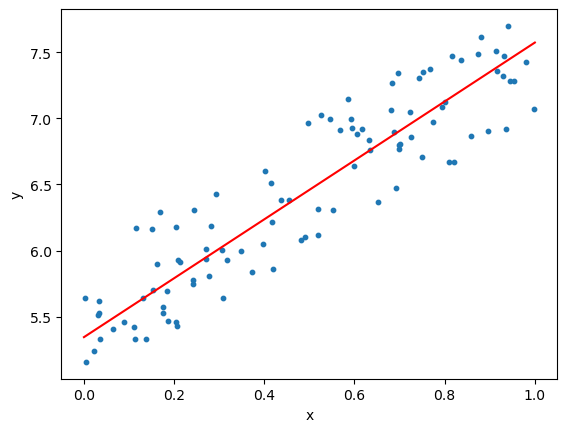

In [15]:
torch.manual_seed(0)
x = torch.rand(100, 1)
y = 2 * x + 5 + torch.rand(100, 1)

lr = 0.1
iters = 100

model = Model2()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

for i in range(iters):
    y_hat = model(x)
    loss = F.mse_loss(y, y_hat)

    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if i % 10 == 0:
        print(loss.item())

# print(loss.item(), ', W = ', model.linear.weight.item(), ', b = ', model.linear.bias.item())
print(loss.item(), ', W = ', model.state_dict()['linear.weight'].item(), ', b = ', model.state_dict()['linear.bias'].item())


plt.scatter(x.data.numpy(), y.data.numpy(), s=10)
x = torch.tensor([[0.0], [1.0]])
y = model(x).detach().numpy()
plt.plot(x, y, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

0.7643452286720276
0.23656320571899414
0.2322607785463333
0.22441406548023224
0.21026141941547394
0.17957870662212372
0.11798439919948578
0.08477357029914856
0.08017147332429886
0.07964649796485901
0.07944130152463913
('linear1.weight', Parameter containing:
tensor([[-0.2940],
        [ 2.1882],
        [-8.2330],
        [-2.3995],
        [-2.5362],
        [ 2.1084],
        [-1.7190],
        [ 7.7062],
        [ 0.5216],
        [ 0.1528]], requires_grad=True))
('linear1.bias', Parameter containing:
tensor([-0.3123, -1.0995,  3.9535,  0.3868,  0.3209, -0.9389, -0.2679, -3.7141,
         0.2821, -0.9976], requires_grad=True))
('linear2.weight', Parameter containing:
tensor([[-0.2169,  2.6360,  3.4404, -2.6927, -2.9298,  2.4468, -1.8259, -2.9299,
          0.4955,  0.1454]], requires_grad=True))
('linear2.bias', Parameter containing:
tensor([-0.3284], requires_grad=True))


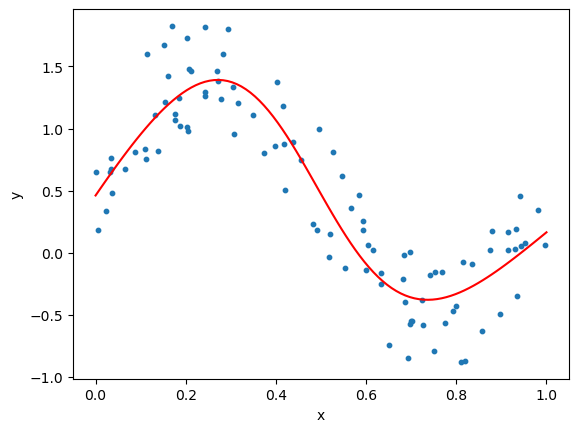

In [16]:
torch.manual_seed(0)
x = torch.rand(100, 1)
y = torch.sin(2 * torch.pi * x) + torch.rand(100, 1)

class Model3(nn.Module):
    def __init__(self, input_size=1, hidden_size=10, output_size=1):
        super().__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        y = self.linear1(x)
        y = F.sigmoid(y)
        y = self.linear2(y)
        return y


lr = 0.2
iters = 10000

model = Model3()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

for i in range(iters):
    y_pred = model(x)
    loss = F.mse_loss(y, y_pred)

    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if i % 1000 == 0:
        print(loss.item())

print(loss.item())
for param in model.named_parameters():
    print(param)


plt.scatter(x.data.numpy(), y.data.numpy(), s=10)
x = torch.linspace(0, 1, 100).reshape(-1, 1)
y = model(x).detach().numpy()
plt.plot(x, y, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [17]:
print('W1 = ', model.linear1.weight.detach())
print('b1 = ', model.linear1.bias.detach())
print('W2 = ', model.linear2.weight.detach())
print('b2 = ', model.linear2.bias.detach())
# print(loss.item(), ', W = ', model.state_dict()['linear.weight'].item(), ', b = ', model.state_dict()['linear.bias'].item())


W1 =  tensor([[-0.2940],
        [ 2.1882],
        [-8.2330],
        [-2.3995],
        [-2.5362],
        [ 2.1084],
        [-1.7190],
        [ 7.7062],
        [ 0.5216],
        [ 0.1528]])
b1 =  tensor([-0.3123, -1.0995,  3.9535,  0.3868,  0.3209, -0.9389, -0.2679, -3.7141,
         0.2821, -0.9976])
W2 =  tensor([[-0.2169,  2.6360,  3.4404, -2.6927, -2.9298,  2.4468, -1.8259, -2.9299,
          0.4955,  0.1454]])
b2 =  tensor([-0.3284])


100%|██████████| 9.91M/9.91M [00:02<00:00, 3.91MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 131kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.15MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 1.30MB/s]


size: 60000
type: <class 'PIL.Image.Image'>
label: 5


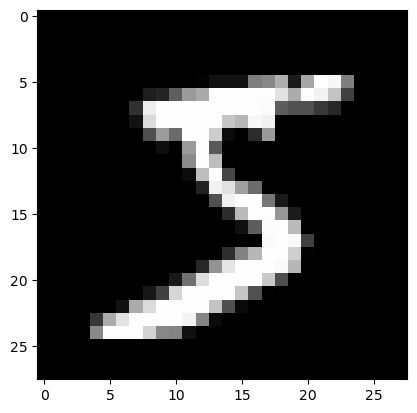

In [18]:
# ==== MNIST ====
dataset = torchvision.datasets.MNIST(
    root='./data',
    train=True,
    transform=None,
    download=True
)

x, label = dataset[0]

print('size:', len(dataset))  # size: 60000
print('type:', type(x))  # type: <class 'PIL.Image.Image'>
print('label:', label)  # label: 5

plt.imshow(x, cmap='gray')
plt.show()

In [19]:
# Preprocess
transform = transforms.ToTensor()

dataset = torchvision.datasets.MNIST(
    root='./data',
    train=True,
    transform=transform,
    download=True
)

x, label = dataset[0]
print('type: ', type(x))
print('shape: ', x.shape)
print('=====================')

dataloader = torch.utils.data.DataLoader(
    dataset,
    batch_size=32,
    shuffle=True
)

for x, label in dataloader:
    print('x shape: ', x.shape)
    print('label shape: ', label.shape)
    break

type:  <class 'torch.Tensor'>
shape:  torch.Size([1, 28, 28])
x shape:  torch.Size([32, 1, 28, 28])
label shape:  torch.Size([32])
